In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import plotly.express as px
import seaborn as sns
def plot_pca(data, num_components, mode = "ER", pcs = [1,2], title = "Genes", scale = 7000):
    #PCA on all Genes
    pca = PCA(n_components = num_components) 
    pca_result = pca.fit_transform(data.drop(columns=['ER', 'PAM50']))

    if mode == "ER":
        color_map = {'Positive': 'blue', 'Negative': 'red', 'missing': 'black'}
        color_values = data['ER'].map(color_map).fillna('black')
        red_patch = mpatches.Patch(color='red', label='ER Negative')
        blue_patch = mpatches.Patch(color='blue', label='ER Positive')
        black_patch = mpatches.Patch(color='black', label='ER missing')
        patches = [red_patch, blue_patch, black_patch]

        color_plotly = data['ER'].fillna('missing')
    else:
        color_map = {'LumA': "blue", 'LumB': "green",'Her2': "pink", "Basal":"red", "Normal": "black"}
        color_values = data['PAM50'].map(color_map)
        black_patch = mpatches.Patch(color='black', label='Normal')
        blue_patch = mpatches.Patch(color='blue', label='LumA')
        green_patch = mpatches.Patch(color = "green", label = "LumB")
        pink_patch = mpatches.Patch(color = "pink", label = 'Her2')
        red_patch = mpatches.Patch(color = "red", label = "Basal")
        patches = [red_patch, blue_patch, green_patch, pink_patch, black_patch]
        color_plotly = data['PAM50']

    
    print("Explained variance ratio by each component:")
    print(pca.explained_variance_ratio_)

    if len(pcs) != 2:
        pca_df = pd.DataFrame(data=pca_result, columns= [f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)])
        pca_df['label'] = color_plotly.values
        g = sns.pairplot(
            pca_df,
            hue='label',
            corner=True,
            palette= color_map,
            aspect=1.5
        )
        for text in g._legend.texts:
            text.set_fontsize(12)
        g._legend.get_title().set_fontsize(14)

        loadings = pca.components_  # shape: (4, num_features)
        features = [f"gene {i+1}" for i in range(5)]

        ax = g.axes[1, 0]  
        for i, feature in enumerate(features):
            x = loadings[0, i] * scale
            y = loadings[1, i] * scale
            pos = 100 if scale == 7000 else 30
            ax.arrow(pos, pos,x, y, color='black', alpha=0.7, head_width=0.1)
            ax.text(pos+1.1* x, pos+ 1.1*y, feature, color='black', fontsize=9)

        plt.show()
    else:
        pca_df = pd.DataFrame(data=pca_result, columns= [f"PC{i+1}" for i, var in enumerate(pca.explained_variance_ratio_ * 100)])

        plt.figure(figsize=(8, 6))
        plt.scatter(pca_df[f'PC{pcs[0]}'], pca_df[f'PC{pcs[1]}'], c= color_values)
        plt.title(f"PCA Results on {title}")
        plt.xlabel(f"Principal Component {pcs[0]}")
        plt.ylabel(f"Principal Component {pcs[1]}")
        plt.legend(handles=patches, loc='upper right')
        plt.show()

    return pca_df

In [28]:
import pandas as pd
normdf = pd.read_csv("../RData/normalized_expression.csv") #loading dataset
mapdf = pd.read_csv("../RData/gene_mappings.csv") #loading mappings dataset

In [29]:
metadf = pd.read_csv("../RData/metadata_randomGroup.csv") #loading metadata dataset
metadf.set_index("mRNA", inplace=True)
metadf['PAM50'] = metadf['PAM50'].replace("HER2", "Her2")

## Protein coding, before normalization

(19944, 785)
Explained variance ratio by each component:
[0.20747015 0.14889894 0.12732859 0.04741524]


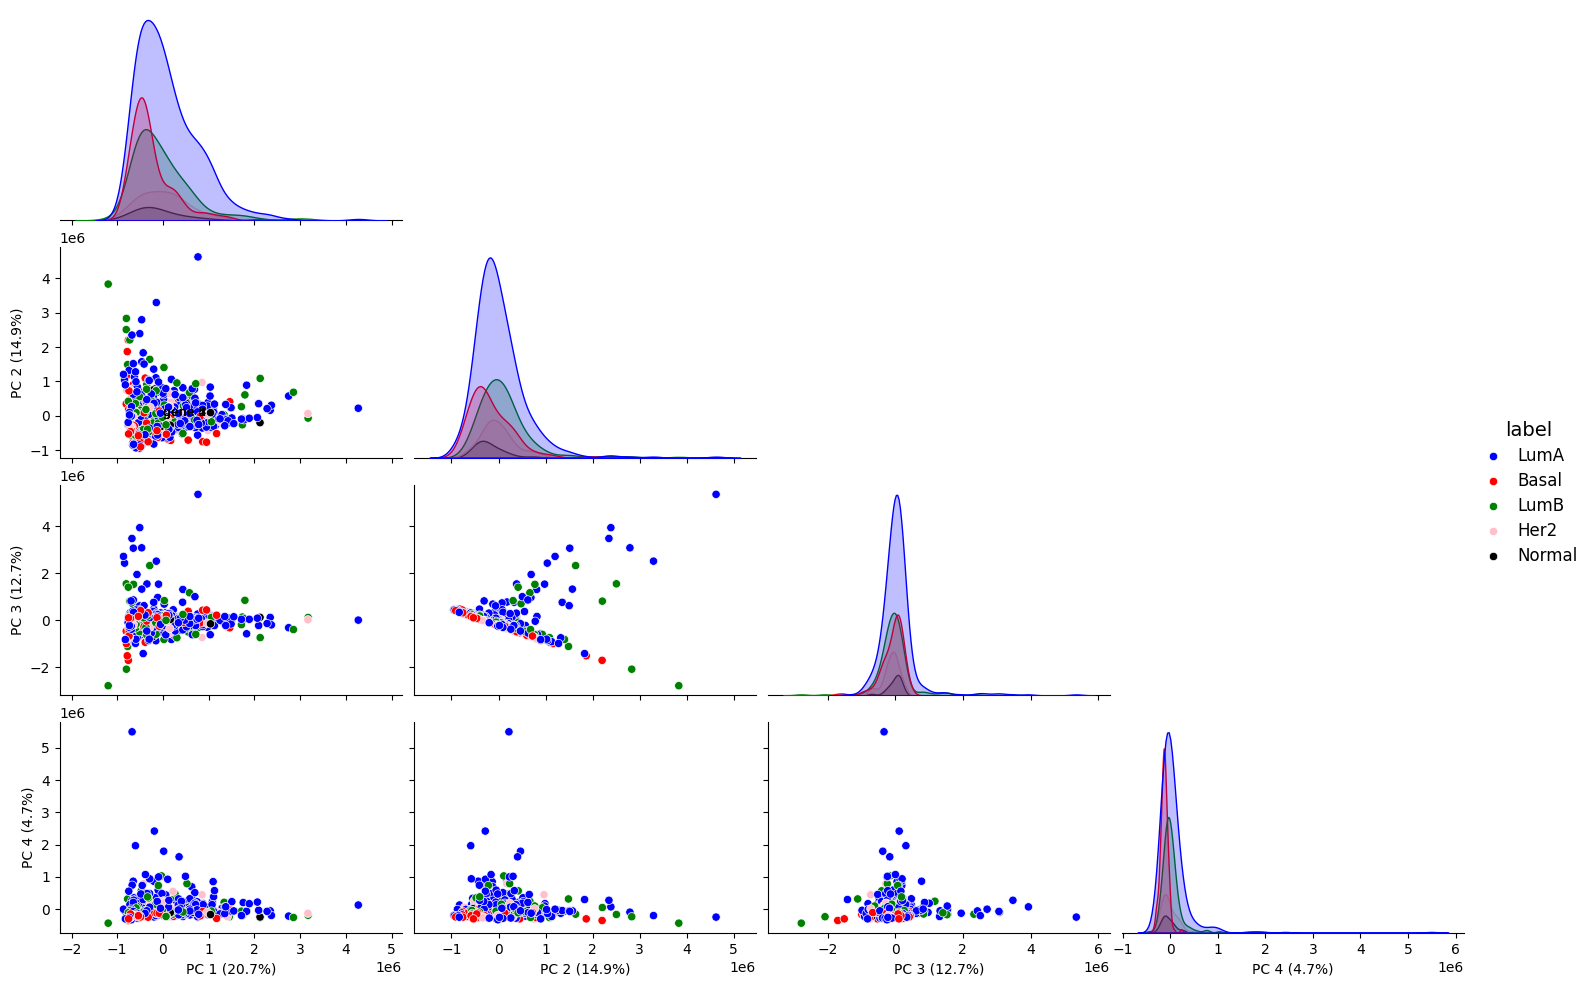

In [30]:
genedf = pd.read_csv("../RData/gene_expression.csv")
genedf.rename(columns={'Unnamed: 0': 'ENSEMBLID'}, inplace=True)
genedf = pd.merge(genedf, mapdf, on =  "ENSEMBLID", how='left')
genedf.set_index("ENSEMBLID", inplace=True)
ERgenedf = genedf.T.drop(["GENETYPE", "GENESYMBOL"])
ERgenedf = ERgenedf.merge(metadf[['ER', 'PAM50']], left_index=True, right_index=True, how='left')
fgenedf = genedf.loc[genedf["GENETYPE"] == "protein_coding", :]
print(fgenedf.shape)
ERpgenedf = fgenedf.T.drop(["GENETYPE", "GENESYMBOL"])
ERpgenedf = ERpgenedf.merge(metadf[['ER', 'PAM50']], left_index=True, right_index=True, how='left')
pca_df = plot_pca(ERpgenedf, 4, mode="PAM50", pcs = [1,2, 3,4], title = "Protein Coding Genes")

# 2. PCA with protein coding genes (19944 genes)

In [31]:
#merging mapping df with gene expression df
normdf.rename(columns={'Unnamed: 0': 'ENSEMBLID'}, inplace=True)
normdf = pd.merge(normdf, mapdf, on =  "ENSEMBLID", how='left')
normdf.set_index("ENSEMBLID", inplace=True)
normdf.head()

,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-BH-A0HQ-01A-11R-A034-07,TCGA-BH-A18G-01A-11R-A12D-07,TCGA-A8-A09K-01A-11R-A00Z-07,TCGA-BH-A0BZ-01A-31R-A12P-07,TCGA-A1-A0SD-01A-11R-A115-07,TCGA-A1-A0SF-01A-11R-A144-07,TCGA-A1-A0SI-01A-11R-A144-07,TCGA-A1-A0SJ-01A-11R-A084-07,TCGA-A1-A0SK-01A-12R-A084-07,...,TCGA-41-2572-01A-01R-1850-01,TCGA-06-0138-01A-02R-1849-01,TCGA-06-0211-01A-01R-1849-01,TCGA-06-0178-01A-01R-1849-01,TCGA-28-2499-01A-01R-1850-01,TCGA-06-1804-01A-01R-1849-01,TCGA-26-1442-01A-01R-1850-01,TCGA-28-1747-01C-01R-1850-01,GENESYMBOL,GENETYPE
ENSEMBLID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,11.643945,12.660240,12.011286,10.902371,9.778870,11.086341,13.304347,11.204773,12.835616,12.470305,...,12.294185,12.843887,12.083013,13.196523,13.764084,11.588476,12.021739,12.586284,TSPAN6,protein_coding
ENSG00000000005,3.527251,1.141077,0.000000,2.923184,3.371978,5.487672,3.474578,2.517265,7.229333,0.000000,...,3.783844,5.468667,3.113357,3.538314,3.256006,2.887933,2.922775,3.424977,TNMD,protein_coding
ENSG00000000419,11.004391,10.379188,10.492609,10.625022,12.325179,11.250164,10.834781,11.193174,12.695187,11.631386,...,10.692166,11.044221,10.430246,11.321920,10.528515,10.027390,10.016298,10.270992,DPM1,protein_coding
ENSG00000000457,10.216685,10.975065,10.788455,11.340000,10.827489,10.294248,10.472310,11.166237,10.304750,9.737110,...,8.542477,9.221241,8.977203,10.255138,8.946696,8.857296,9.003882,9.138294,SCYL3,protein_coding
ENSG00000000460,9.076165,9.584343,9.316149,8.781399,9.825582,8.366424,8.994853,10.627795,9.219602,10.100473,...,8.379882,8.966339,8.967783,10.208429,7.872731,7.985417,7.840538,8.497433,C1orf112,protein_coding


In [32]:
from collections import Counter
Counter(metadf['ER'])

Counter({'Positive': 510, nan: 111, 'Negative': 162})

(19944, 785)
Explained variance ratio by each component:
[0.10889832 0.07004751 0.05836473 0.04546768]


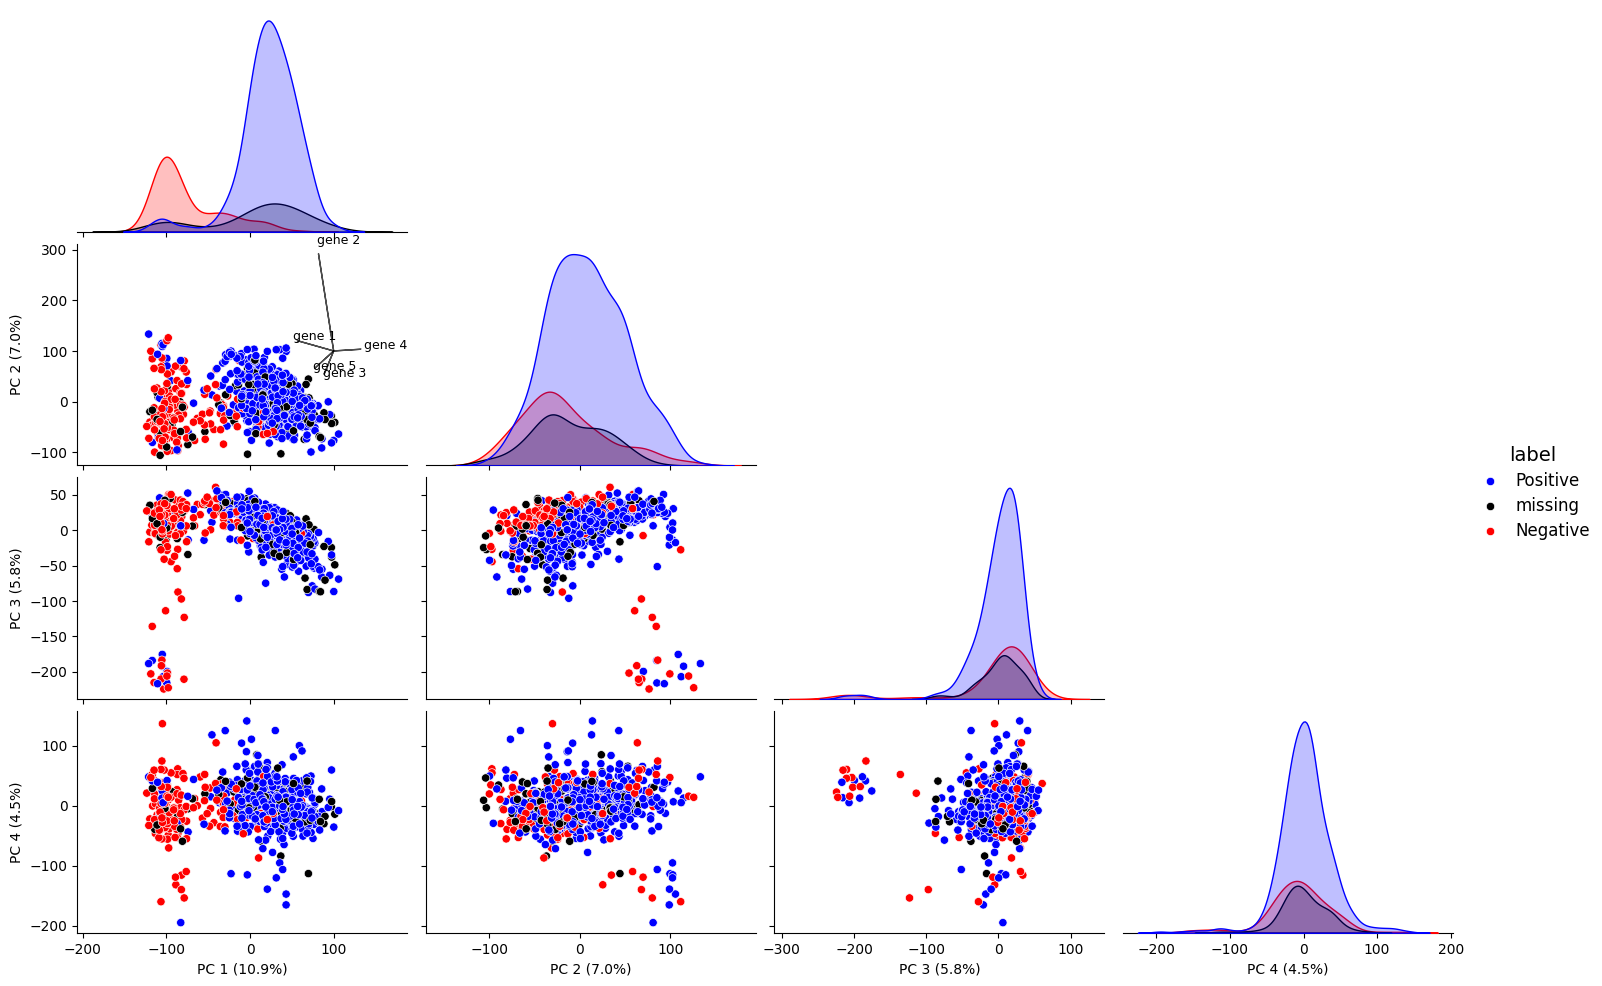

Explained variance ratio by each component:
[0.10889832 0.07004751 0.05836473 0.04546768]


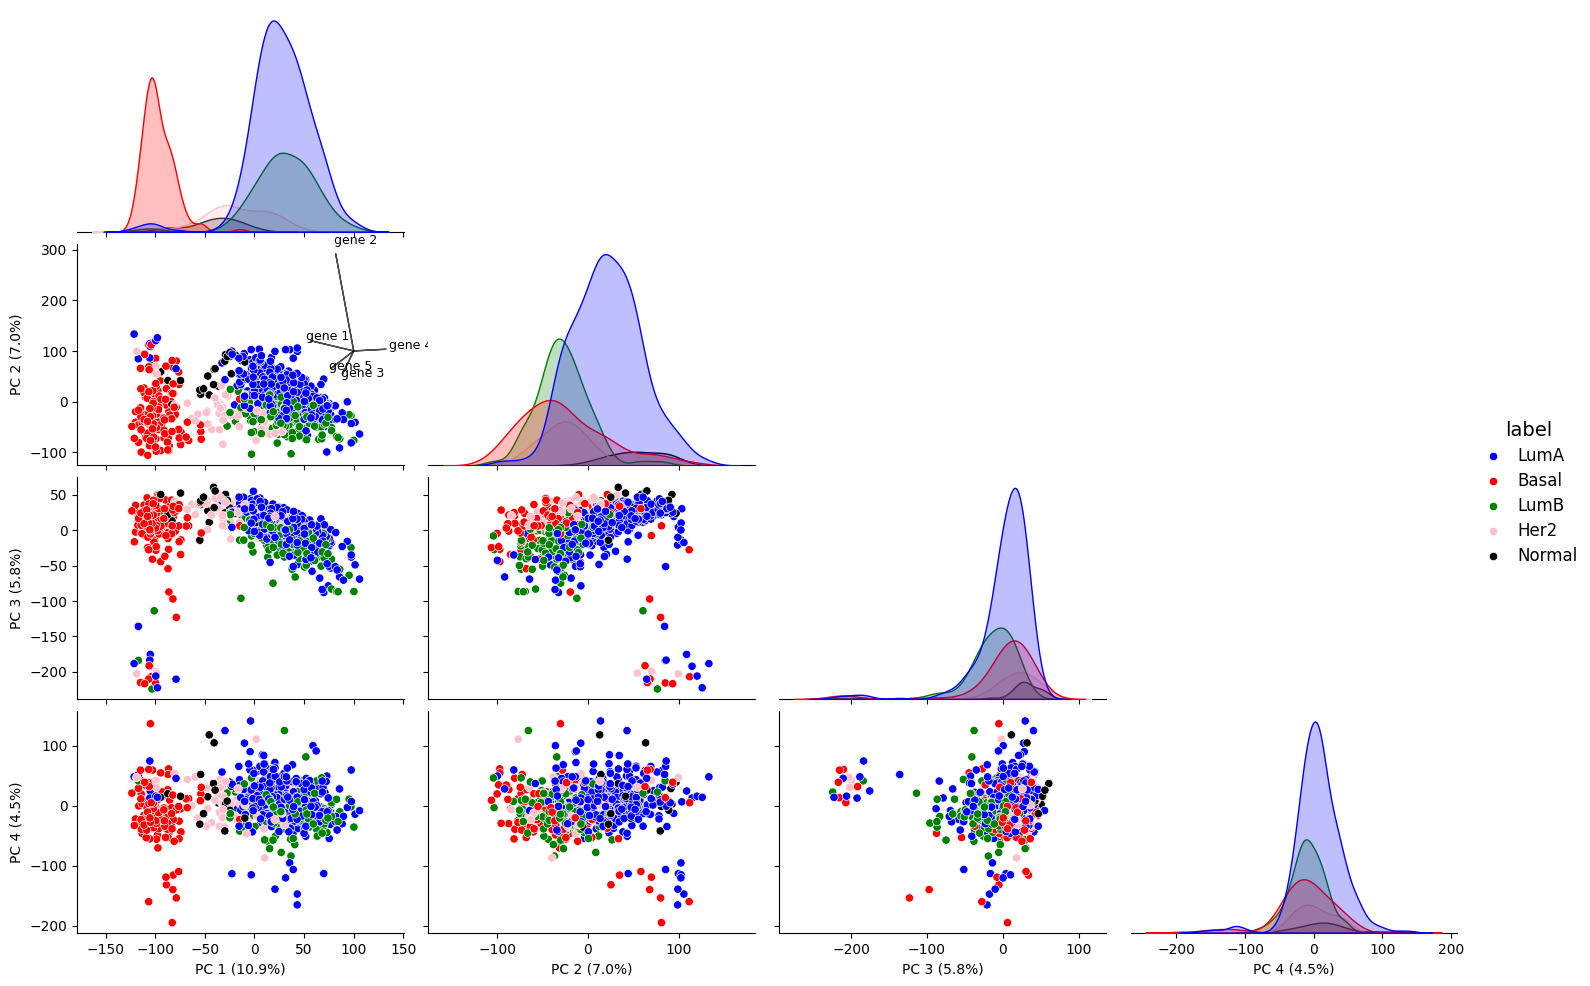

In [33]:
fnormdf = normdf.loc[normdf["GENETYPE"] == "protein_coding", :]
print(fnormdf.shape)
ERpnormdf = fnormdf.T.drop(["GENETYPE", "GENESYMBOL"])
ERpnormdf = ERpnormdf.merge(metadf[['ER', 'PAM50']], left_index=True, right_index=True, how='left')
pca_df = plot_pca(ERpnormdf, 4, pcs = [1,2, 3,4], title = "Protein Coding Genes")
pca_df = plot_pca(ERpnormdf, 4, mode="PAM50", pcs = [1,2, 3,4], title = "Protein Coding Genes")

##### Observation: Luminal and Basal types exhibit clustering based on PC 1,2 plot.

# 3. PCA with reduced genes (2000 genes), based on mean and variance.

In [34]:
tnormdf = fnormdf.T
print(tnormdf.shape)
#Removing all genes with over 50% zeroes
zero_proportion = (tnormdf == 0).sum() / (len(tnormdf) - 2) #subtracted 2 because of the added 2 columns for gene mapping
no0df = tnormdf.loc[:, zero_proportion < 0.5]
no0df.shape

(785, 19944)


(785, 17349)

In [35]:
#Removing all genes with means less than 10
genemaprows = no0df.loc[["GENETYPE","GENESYMBOL"]]
fltno0df = no0df.drop(["GENETYPE", "GENESYMBOL"])
colmeans = fltno0df.mean(axis = 0)
filtereddf = fltno0df.loc[:,colmeans >= 10]
print(filtereddf.shape)

(783, 8094)


In [36]:
#taking top 2000 columns with highest variances
import numpy as np
variances = np.var(filtereddf, axis=0)
filtereddf.loc['variances'] = variances
filtereddf = filtereddf.sort_values(by='variances', axis=1, ascending=False)
finaldf = filtereddf.iloc[:, 0:2000]
print(finaldf.shape)
finaldf = finaldf.drop(index = "variances")

(784, 2000)


/var/folders/jl/rbvmwg3n24xd1j1wh9xr7vjm0000gn/T/ipykernel_10531/2654462262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereddf.loc['variances'] = variances


Explained variance ratio by each component:
[0.17853079 0.09401146 0.07843436 0.0570473 ]


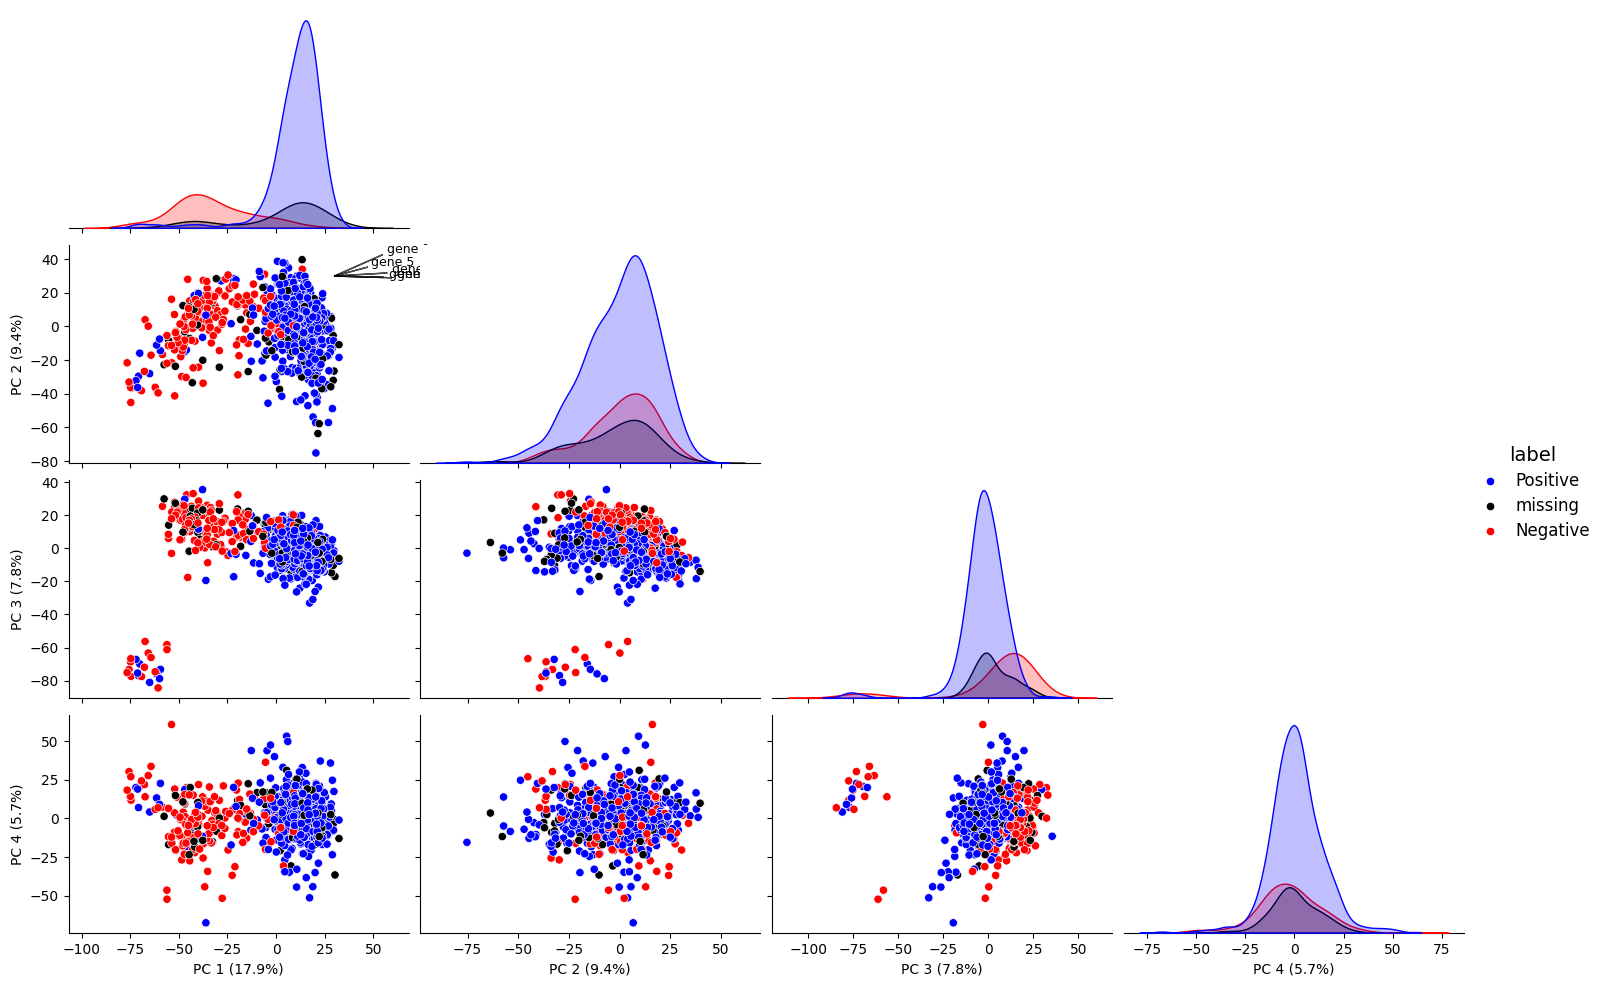

Explained variance ratio by each component:
[0.17853079 0.09401146 0.07843436 0.0570473 ]


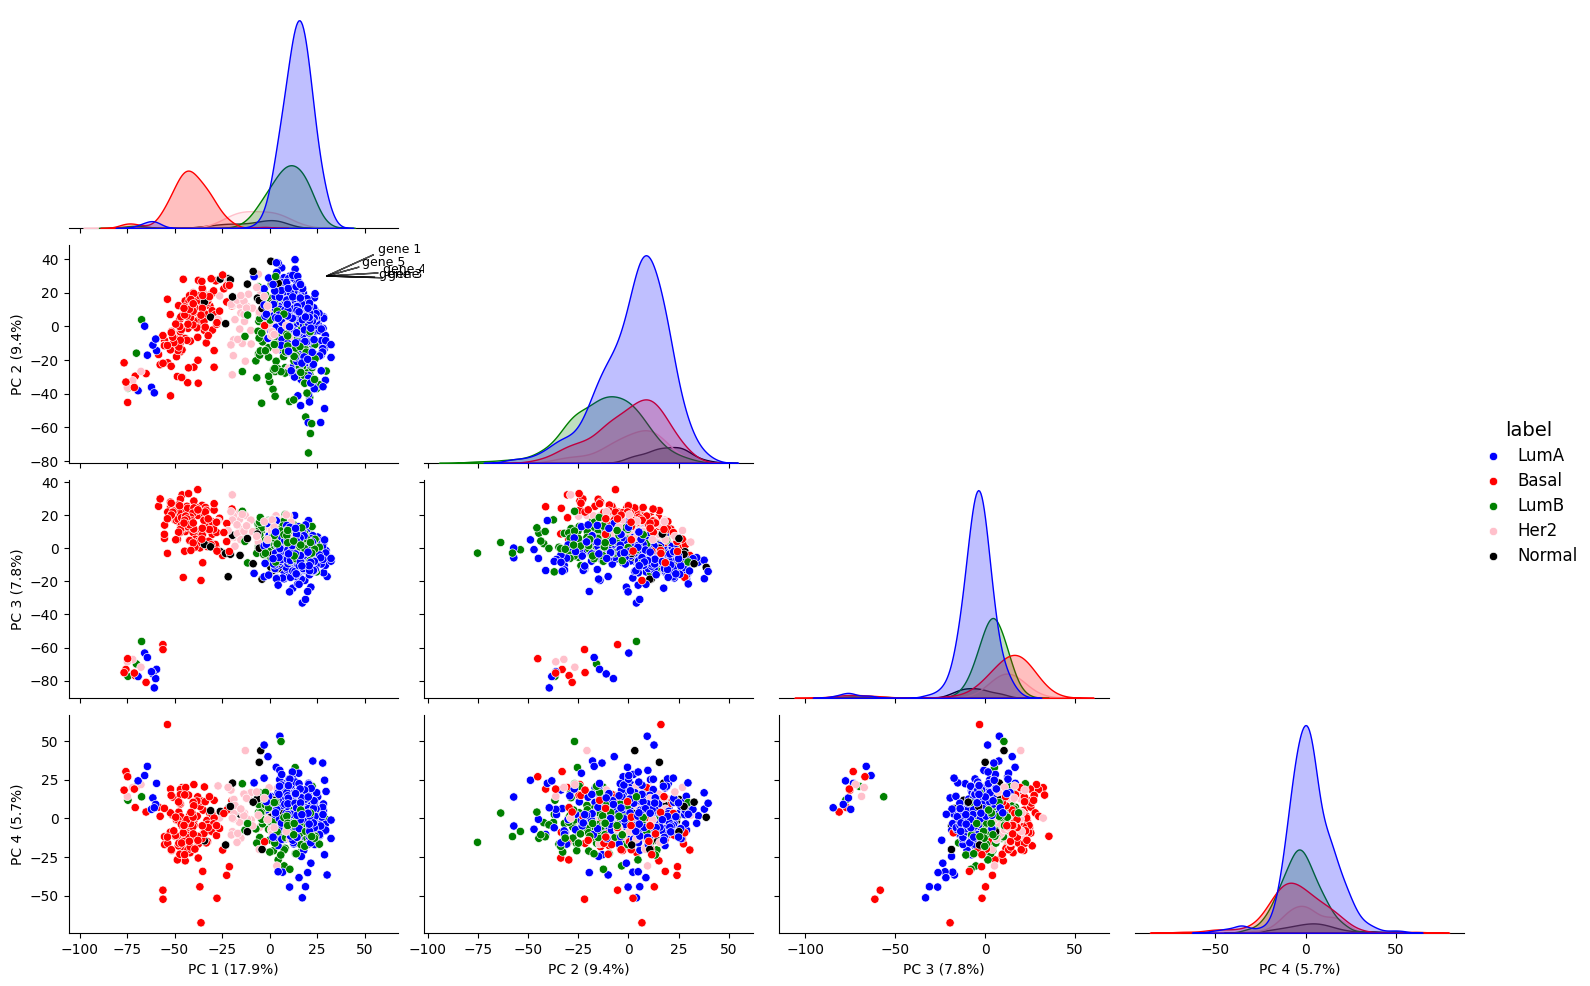

In [59]:
ERfinaldf = finaldf.merge(metadf[['ER', 'PAM50']], left_index=True, right_index=True, how='left')
pca_df = plot_pca(ERfinaldf, 4, pcs = [1,2, 3,4], title = "Protein Coding Genes", scale = 200)
pca_df = plot_pca(ERfinaldf, 4, mode="PAM50", pcs = [1,2, 3,4], title = "Protein Coding Genes", scale = 200)

#### PC Loading plot

In [38]:
pca = PCA(n_components = 4) 
pca_result = pca.fit_transform(ERfinaldf.drop(columns=['ER', 'PAM50']))
loadings = pca.components_.T  # shape: (n_features, n_components)

In [50]:
selected_genes_from_LASSO = ['ENSG00000173467', 'ENSG00000151892', 'ENSG00000091831',
       'ENSG00000204385', 'ENSG00000134258', 'ENSG00000175356',
       'ENSG00000104332', 'ENSG00000003989', 'ENSG00000171428',
       'ENSG00000132465', 'ENSG00000115221', 'ENSG00000158258',
       'ENSG00000135480', 'ENSG00000159166', 'ENSG00000074410',
       'ENSG00000168350', 'ENSG00000166106', 'ENSG00000196208',
       'ENSG00000058085', 'ENSG00000135218', 'ENSG00000125740',
       'ENSG00000111341', 'ENSG00000062038', 'ENSG00000146648',
       'ENSG00000117115', 'ENSG00000134755', 'ENSG00000103257',
       'ENSG00000254726', 'ENSG00000166927', 'ENSG00000121039',
       'ENSG00000117399', 'ENSG00000137563', 'ENSG00000135916',
       'ENSG00000094804', 'ENSG00000111206', 'ENSG00000083857',
       'ENSG00000091490', 'ENSG00000104341', 'ENSG00000029993',
       'ENSG00000146072', 'ENSG00000139146', 'ENSG00000136193',
       'ENSG00000152894', 'ENSG00000108344', 'ENSG00000106392']


In [51]:
gene_ids = ERfinaldf.T.drop(["ER", "PAM50"]).index.tolist()

is_selected = [gene in selected_genes_from_LASSO for gene in gene_ids]

colors = ['red' if selected else 'C0' for selected in is_selected]


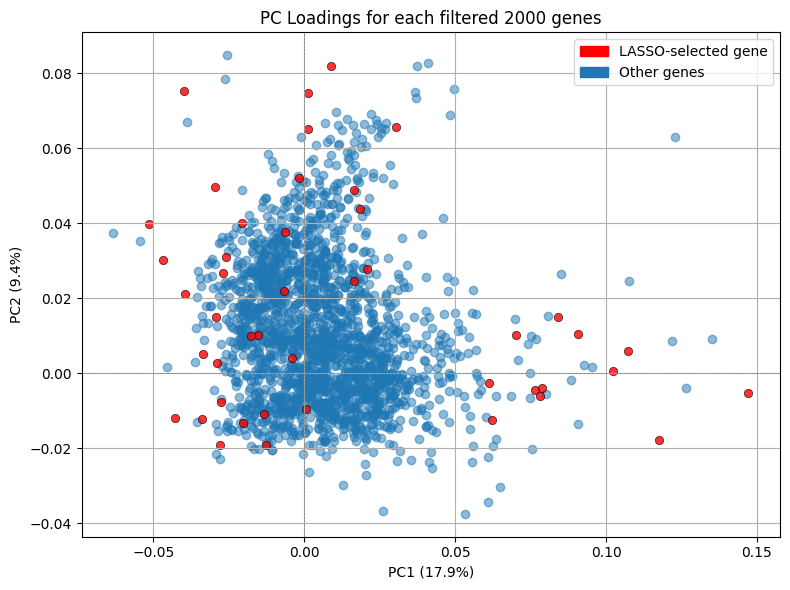

In [52]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    loadings[~np.array(is_selected), 0],
    loadings[~np.array(is_selected), 1],
    color='C0', alpha=0.5,  label='Other genes'
)


plt.scatter(
    loadings[np.array(is_selected), 0],
    loadings[np.array(is_selected), 1],
    color='red', edgecolor='black', linewidth=0.5,
    alpha=0.8,  label='LASSO-selected gene'
)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', edgecolor='red', label='LASSO-selected gene'),
    Patch(facecolor='C0', edgecolor='C0', label='Other genes')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PC Loadings for each filtered 2000 genes")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Final observations:
1. The PCA plot consistently revealed some samples that are suspected outliers.
2. The PCA plot shows distinct clusters corresponding to ER receptor status and PAM50 groups. 

## Remove outliers

In [42]:
outliers= ['TCGA-06-0211-01B-01R-1849-01', 'TCGA-06-0211-02A-02R-2005-01',
       'TCGA-06-0130-01A-01R-1849-01', 'TCGA-06-0132-01A-02R-1849-01',
       'TCGA-16-1045-01B-01R-1850-01', 'TCGA-06-0125-01A-01R-1849-01',
       'TCGA-06-0125-02A-11R-2005-01', 'TCGA-06-0139-01A-01R-1849-01',
       'TCGA-26-5132-01A-01R-1850-01', 'TCGA-15-1444-01A-02R-1850-01',
       'TCGA-32-2616-01A-01R-1850-01', 'TCGA-06-0750-01A-01R-1849-01',
       'TCGA-41-2572-01A-01R-1850-01', 'TCGA-06-0138-01A-02R-1849-01',
       'TCGA-06-0211-01A-01R-1849-01', 'TCGA-06-0178-01A-01R-1849-01',
       'TCGA-28-2499-01A-01R-1850-01', 'TCGA-06-1804-01A-01R-1849-01',
       'TCGA-26-1442-01A-01R-1850-01', 'TCGA-28-1747-01C-01R-1850-01']

In [61]:
ERfinaldf = ERfinaldf.drop(index = outliers)
ERfinaldf.shape

(763, 2002)

In [ ]:
#import numpy as np#metadf['Group'] = metadf['ER'].apply(lambda x: 6 if pd.isna(x) else np.random.randint(1, 6))
#csv_filename = "../RData/NoOutlier_protein_coding_normalized.csv"
#ERpnormdf.to_csv(csv_filename, index=True, index_label="mRNA")

Explained variance ratio by each component:
[0.17427    0.10200665 0.06473818 0.04383876]


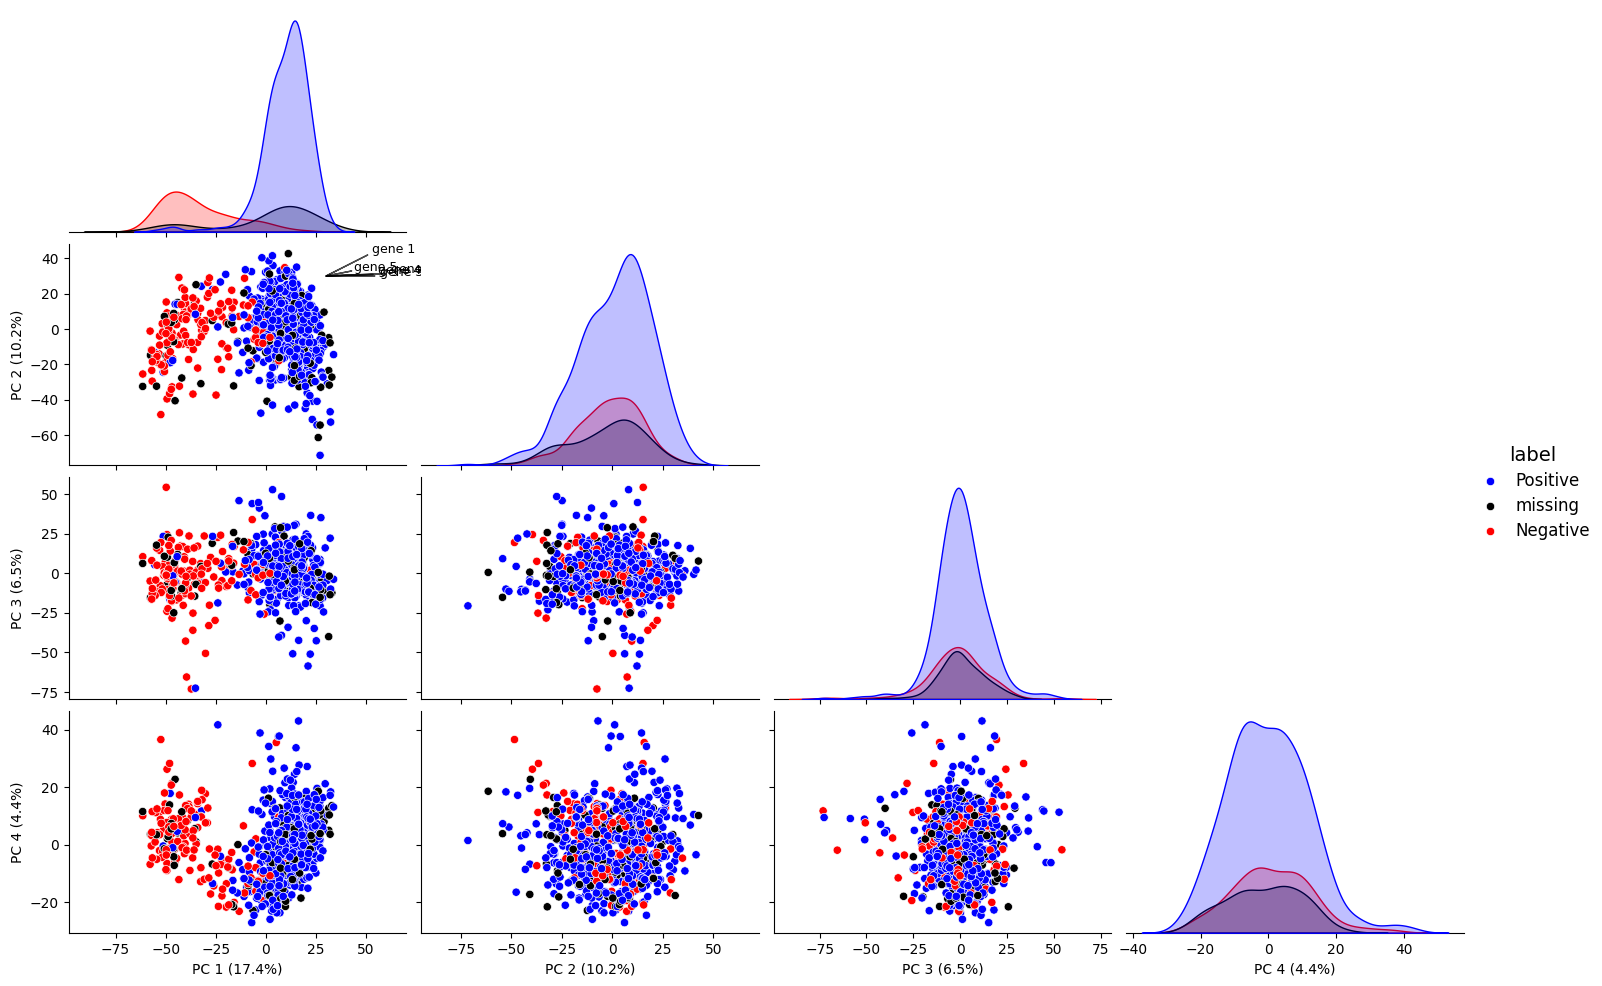

In [45]:
pca_df = plot_pca(ERfinaldf, 4, pcs = [1,2, 3,4], title = "Protein Coding Genes", scale = 200)